<a href="https://colab.research.google.com/github/Srivastava27/collabPython/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/PokemonData.csv')

In [3]:
df.head()

,Num,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df.rename(columns={'Type1':'Primary_type','Type2':'Secondary_type'},inplace=True)

In [5]:
df.head()

,Num,Name,Primary_type,Secondary_type,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
df['Primary_type']=="Grass"

0       True
1       True
2       True
3       True
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Primary_type, Length: 800, dtype: bool

In [7]:
grass_pokemon=df[df['Primary_type']=="Grass"]

In [9]:
grass_pokemon.head()

,Num,Name,Primary_type,Secondary_type,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
48,43,Oddish,Grass,Poison,45,50,55,75,65,30,1,False


In [10]:
water_pokemon=df[df['Primary_type']=="Water"]

In [11]:
water_pokemon.head()

,Num,Name,Primary_type,Secondary_type,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False


In [12]:
fire_pokemon=df[df['Primary_type']=="Fire"]

In [13]:
fire_pokemon.head()

,Num,Name,Primary_type,Secondary_type,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False


In [14]:
df.shape

(800, 12)

In [15]:
grass_pokemon.shape

(70, 12)

In [16]:
water_pokemon.shape

(112, 12)

In [17]:
fire_pokemon.shape

(52, 12)

<Axes: xlabel='Speed', ylabel='Count'>

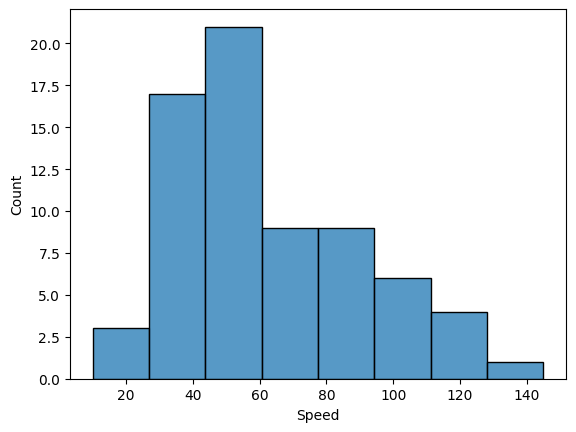

In [18]:
sns.histplot(grass_pokemon['Speed'])

<Axes: xlabel='SpAtk', ylabel='Count'>

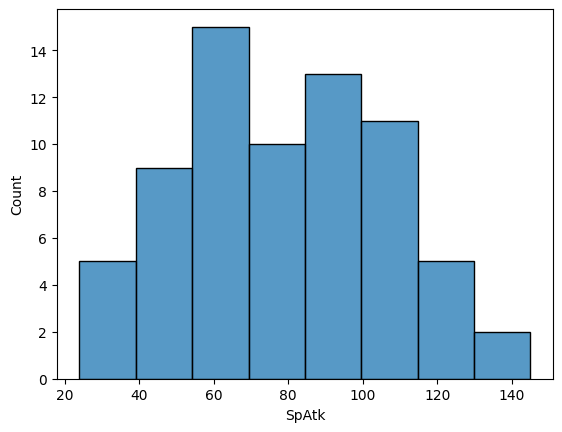

In [20]:
sns.histplot(grass_pokemon['SpAtk'])

<Axes: xlabel='SpDef', ylabel='Count'>

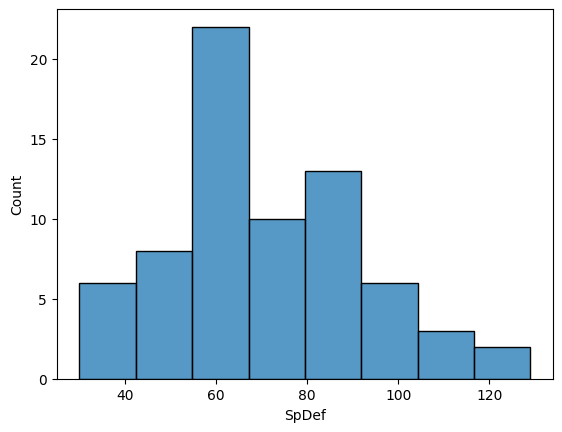

In [21]:
sns.histplot(grass_pokemon['SpDef'])

In [22]:
grass_pokemon.describe()

,Num,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


In [23]:
water_pokemon.head()

,Num,Name,Primary_type,Secondary_type,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,NaN,50,52,48,65,50,55,1,False


<Axes: xlabel='Speed', ylabel='Count'>

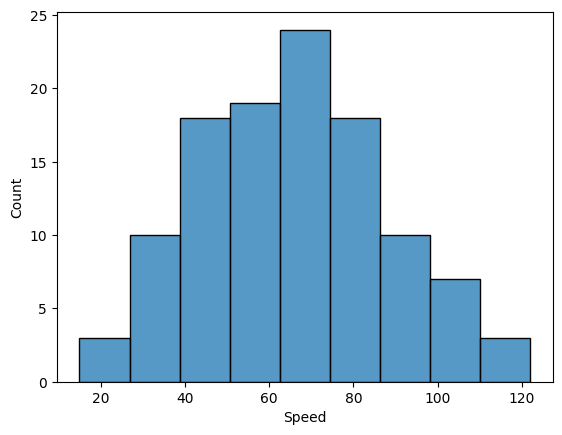

In [24]:
sns.histplot(water_pokemon['Speed'])

<Axes: xlabel='SpAtk', ylabel='Count'>

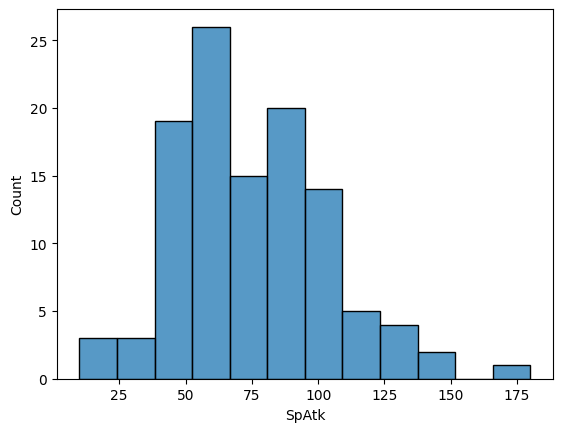

In [25]:
sns.histplot(water_pokemon['SpAtk'])

<Axes: xlabel='SpDef', ylabel='Count'>

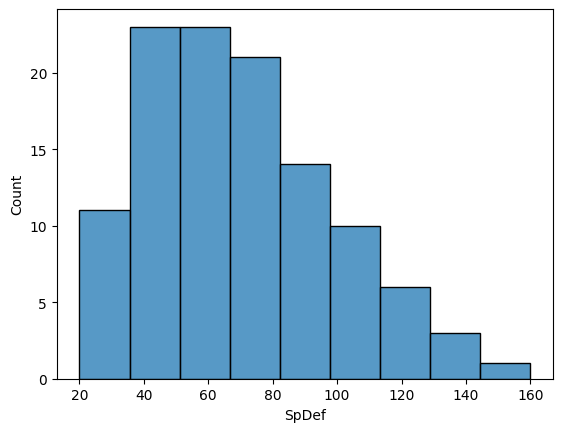

In [26]:
sns.histplot(water_pokemon['SpDef'])

In [27]:
water_pokemon.describe()

,Num,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,303.089286,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143
std,188.440807,27.487026,28.377192,27.773809,29.030128,28.460493,23.019353,1.558800
min,7.000000,20.000000,10.000000,20.000000,10.000000,20.000000,15.000000,1.000000
25%,130.000000,52.250000,53.000000,54.500000,55.000000,50.000000,50.000000,1.000000
50%,275.000000,70.000000,72.000000,70.000000,70.000000,65.000000,65.000000,3.000000
75%,456.250000,90.250000,92.000000,88.500000,90.500000,89.250000,82.000000,4.000000
max,693.000000,170.000000,155.000000,180.000000,180.000000,160.000000,122.000000,6.000000


In [28]:
grass_pokemon.describe()

,Num,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


<Axes: xlabel='Speed', ylabel='Count'>

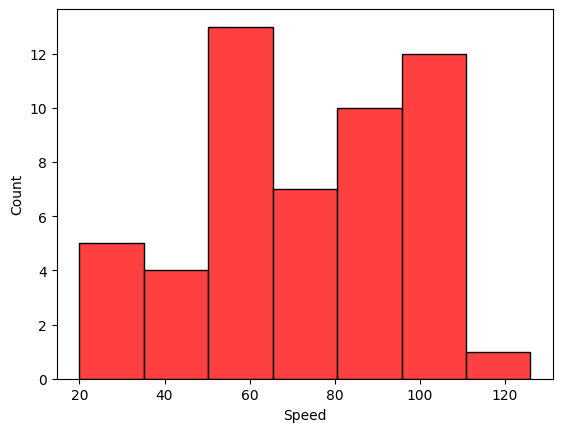

In [29]:
sns.histplot(fire_pokemon['Speed'],color='red')

<Axes: xlabel='SpAtk', ylabel='Count'>

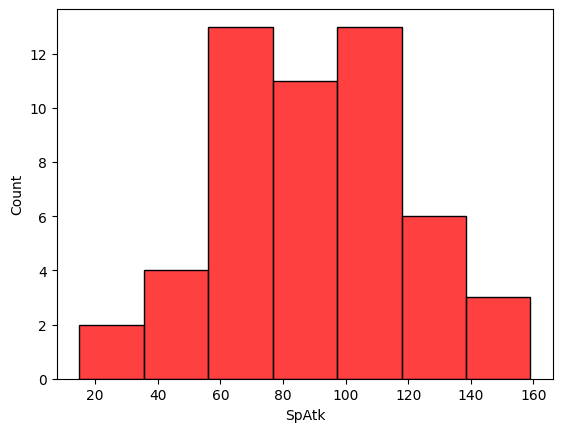

In [30]:
sns.histplot(fire_pokemon['SpAtk'],color="red")

<Axes: xlabel='SpDef', ylabel='Count'>

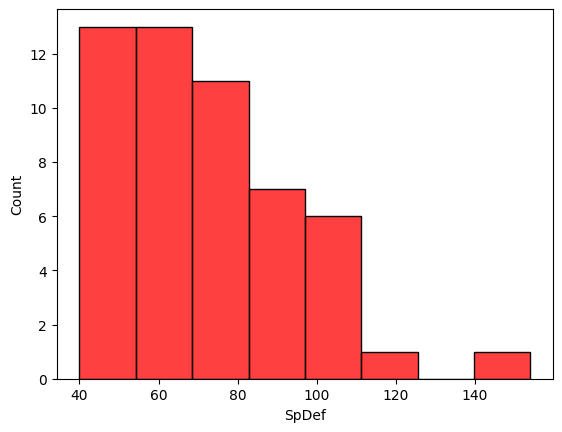

In [31]:
sns.histplot(fire_pokemon['SpDef'],color='red')

In [32]:
fire_pokemon.describe()

,Num,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538
std,226.262840,19.404123,28.769275,23.658200,30.042121,22.619908,25.245783,1.850665
min,4.000000,38.000000,30.000000,37.000000,15.000000,40.000000,20.000000,1.000000
25%,143.500000,58.000000,62.250000,51.000000,70.000000,54.750000,60.000000,1.000000
50%,289.500000,70.000000,84.500000,64.000000,85.000000,67.500000,78.500000,3.000000
75%,513.250000,80.000000,101.000000,78.000000,109.000000,85.000000,96.250000,5.000000
max,721.000000,115.000000,160.000000,140.000000,159.000000,154.000000,126.000000,6.000000


In [43]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [34]:
x=df[['Speed']]

In [45]:
y=df[['Legendary']]

In [41]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [39]:
x.shape


(800, 1)

In [47]:
y.shape

(800, 1)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtc=DecisionTreeClassifier()

In [50]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=dtc.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[214,   5],
       [ 20,   1]])

In [55]:
df.head()

,Num,Name,Primary_type,Secondary_type,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [57]:
x=df[['Defense']]

In [58]:
y=df[['Attack']]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dtr=DecisionTreeRegressor()

In [63]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
y_pred=dtr.predict(x_test)

In [65]:
y_test.head()

,Attack
599,125
500,112
493,130
604,55
556,75


In [66]:
y_pred[0:5]

array([ 95.14285714,  42.        ,  96.94444444, 103.54545455,
        96.94444444])

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(y_test,y_pred)

864.5449265016017